# Decomposition

Decomposition:
Decomposition is the deconstruction of the series data into its various components: trend, cycle, noise, and seasonality when those exist. 

Multiplicative Time Series: when the fluctuations in the time series increase over time and is dependent on the level of the series. Multiplicative Time series  = t (trend) * s (seasonality) * n (noise)

Additive Time Series: An additive model is when the fluctuations in the time series stay constant over time. 
Additive Time series  = t (trend) + s (seasonality) + n (noise)

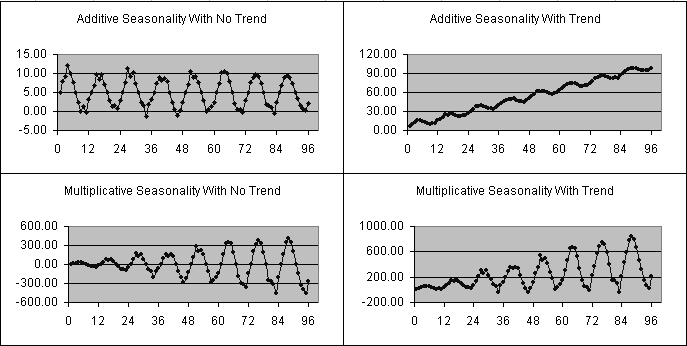

In [48]:
#Importing libraries for data manipulation
import numpy as np
import pandas as pd

#Importing libraries for data plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams["figure.figsize"] = (16,9)

##Importing libraries for decomposition of data into trend, seasonality & noise
from statsmodels.tsa.seasonal import seasonal_decompose

#Importing libraries for checkin stationarity
from statsmodels.tsa.stattools import adfuller

In [4]:
#Loading data
data = pd.read_csv('C:/Users/bhavi/OneDrive/Desktop/Data/Time_Series_Data/airline_passengers.csv', 
                   index_col='Month', 
                   parse_dates=True)

In [57]:
#Checking the data
data.head(13)

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [6]:
#Checking missing values
data.isnull().sum()

Thousands of Passengers    0
dtype: int64

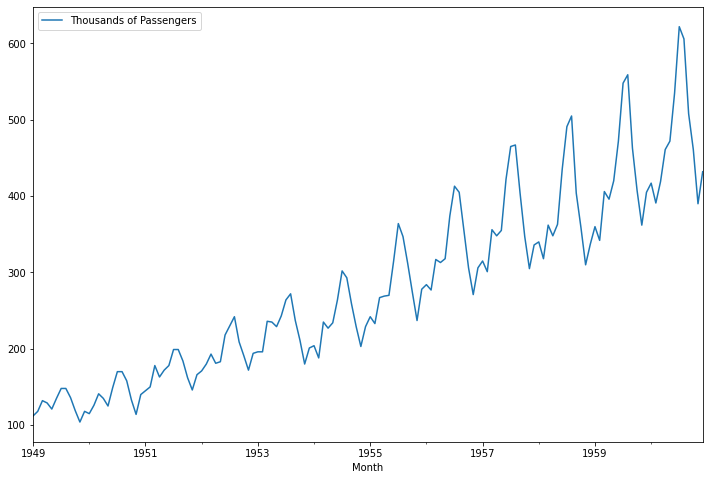

In [9]:
#Plotting the data
data.plot(figsize = (12,8));

The above plot indicates multiplicative seasonality with trend

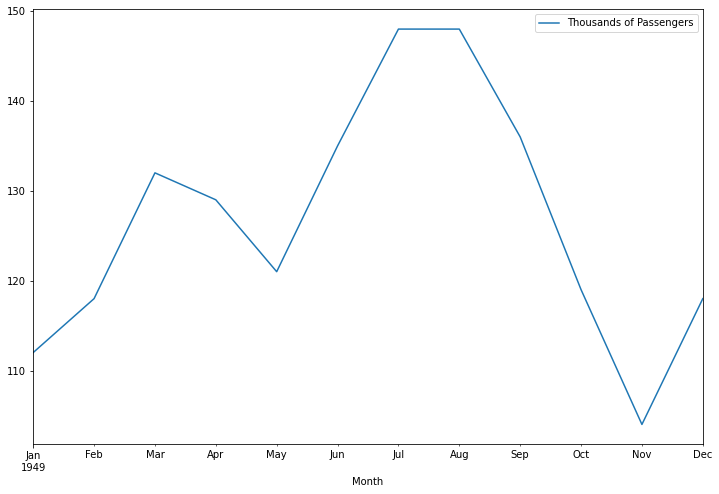

In [58]:
#Plotting one year data
data.loc['1949-01-01':'1949-12-01'].plot(figsize = (12,8));

Every year seasonal impact
1. Jan, Feb - Down
2. Mar, Apr - Pick
3. May - Down
4. June, July, Aug,Sep - Pick
5. Oct, Nov - Down
6. Dec - Pick

# Decomposing data have non stationary

In [10]:
#Creating decomposition of the data
decompose = seasonal_decompose(data['Thousands of Passengers'],
                               model='multiplicative') 
# We have to use multiplicative due to the fluctuations in the time series increase over time and is dependent on the level 
# of the series.

In [11]:
#Checking the result
decompose
#Result is not showing

In [12]:
#Checking individual result
decompose.trend

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [13]:
#Checking individual result
decompose.seasonal

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: seasonal, Length: 144, dtype: float64

In [14]:
#Checking individual result
decompose.resid

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

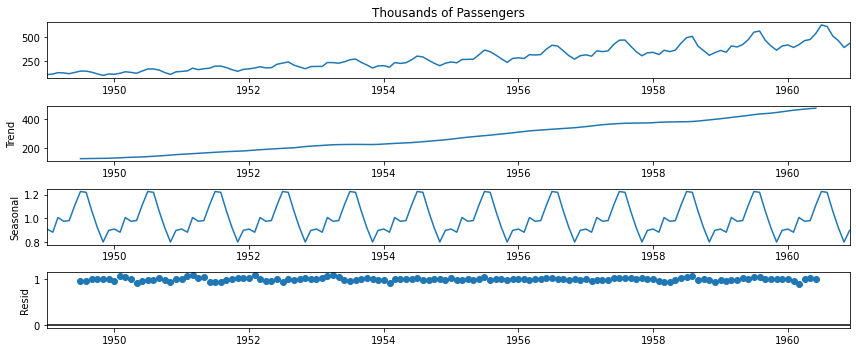

In [49]:
#Plotting the decomposed result
plt.rcParams["figure.figsize"] = (12,5)
decompose.plot();

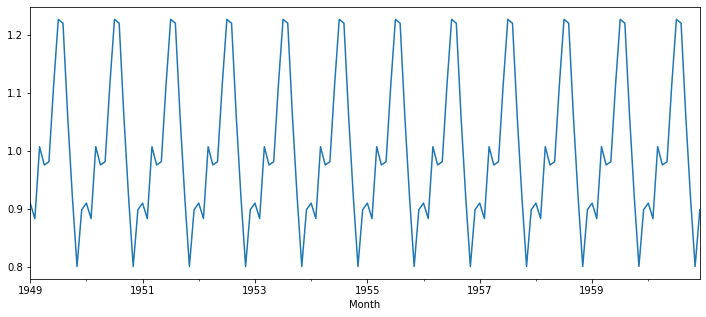

In [50]:
#Creating seasonal plot
decompose.seasonal.plot();

# Decomposing the data have stationary

In [40]:
#Loading data
data2 = pd.read_csv('C:/Users/bhavi/OneDrive/Desktop/Data/Time_Series_Data/DailyTotalFemaleBirths.csv', 
                   index_col='Date', 
                   parse_dates=True)

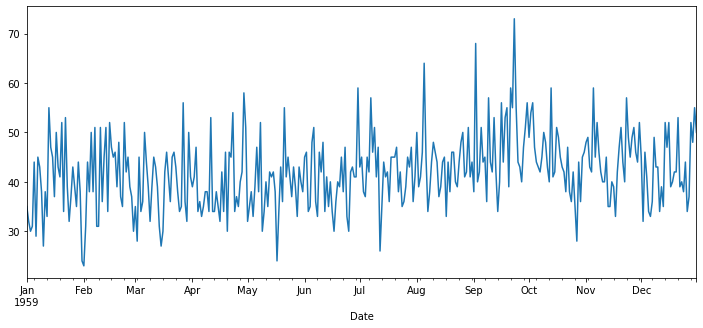

In [44]:
#Creating plot
data2['Births'].plot();

In [59]:
#Creating decomposition of the data
decompose2 = seasonal_decompose(data2['Births'],
                               model='mul')

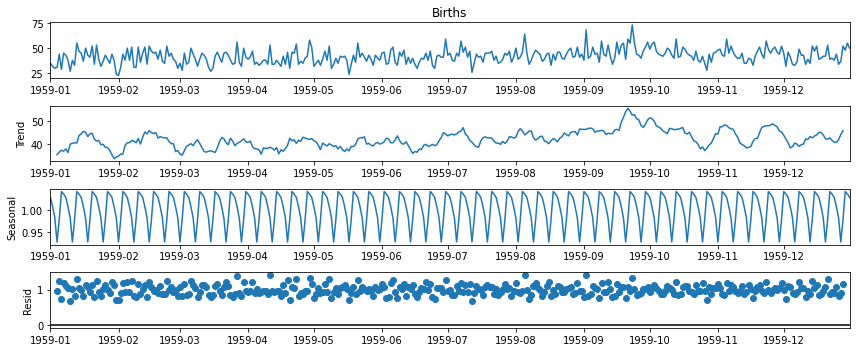

In [60]:
#Plotting the decomposed result
decompose2.plot();

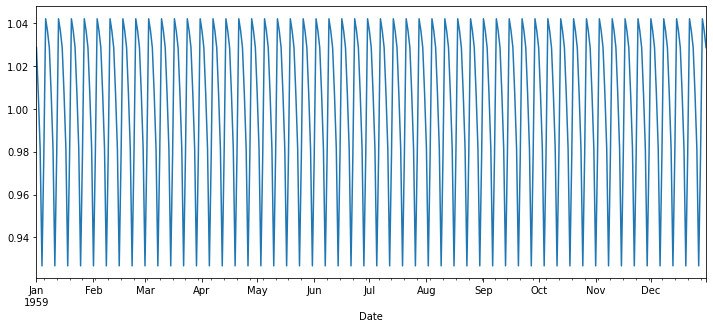

In [61]:
#Creating seasonal plot
decompose2.seasonal.plot();

It is a weekly seasonality in the data